In [343]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics

In [260]:
#1a
df = pd.read_csv('advertising.csv')
df.head()
dep = df.iloc[:,0:-1]
indep = df.iloc[:,[-1]]
print(dep.shape)
print(indep.shape)

(200, 3)
(200, 1)


In [299]:
#1b
sample1 = df[['Radio','Newspaper']]
print("Mean of Radio : ",df['Radio'].mean())
print("Mean of NewsPaper : ",df['Newspaper'].mean())
print("Median of Radio : ",df['Radio'].median())
print("Median of NewsPaper : ",df['Newspaper'].median())
print("Mode of Radio:\n",df['Radio'].mode())
print("Mode of NewsPaper:\n",df['Newspaper'].mode())

Mean of Radio :  23.264000000000024
Mean of NewsPaper :  30.553999999999995
Median of Radio :  22.9
Median of NewsPaper :  25.75
Mode of Radio:
 0    4.1
1    5.7
Name: Radio, dtype: float64
Mode of NewsPaper:
 0     8.7
1     9.3
2    25.6
Name: Newspaper, dtype: float64


In [300]:
df['TV'].median()

149.75

In [301]:
#1c
sample2 = df[df['Sales']<=15.5]
sample2 = sample2[sample2['Sales']>=10.5]
print(sample2.head())
print("-------------------------")
print(len(sample2))

       TV  Radio  Newspaper  Sales
2    17.2   45.9       69.3   12.0
6    57.5   32.8       23.5   11.8
7   120.2   19.6       11.6   13.2
10   66.1    5.8       24.2   12.6
13   97.5    7.6        7.2   13.7
-------------------------
56


In [302]:
#2a
df.head(8)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2


In [303]:
df.tail(6)

,TV,Radio,Newspaper,Sales
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [304]:
df.sample(100)

,TV,Radio,Newspaper,Sales
133,219.8,33.5,45.1,19.6
185,205.0,45.1,19.6,22.6
54,262.7,28.8,15.9,20.2
18,69.2,20.5,18.3,11.3
81,239.8,4.1,36.9,17.3
...,...,...,...,...
147,243.2,49.0,44.3,25.4
194,149.7,35.6,6.0,17.3
3,151.5,41.3,58.5,16.5
161,85.7,35.8,49.3,13.3


In [305]:
#2b
print(df.dtypes)
print("--------------------")
print(df.memory_usage())

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object
--------------------
Index         128
TV           1600
Radio        1600
Newspaper    1600
Sales        1600
dtype: int64


In [306]:
#2c
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [307]:
#2d
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

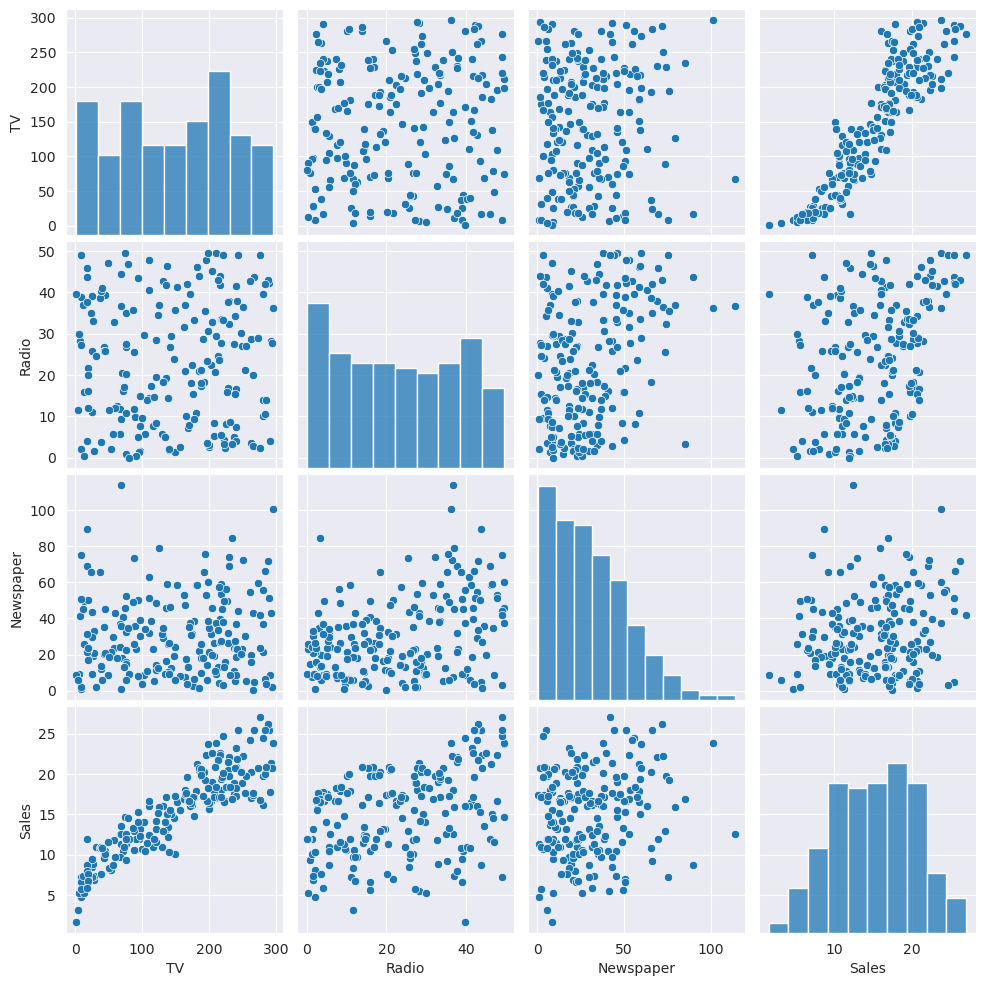

In [308]:
#3a
sns.pairplot(data=df)
plt.show()

TV and Sales is highly correlated as per the observation.
Radio and Sales is least correlated
Newspaper distribution is skewed

In [309]:
#3b
# plt.subplot(1,3,1)
# sns.lmplot(x='TV',y='Sales',data=df)
# plt.subplot(1,3,2)
# sns.lmplot(x='Newspaper',y='Sales',data=df)
# plt.subplot(1,3,3)
# sns.lmplot(x='Radio',y='Sales',data=df)
# plt.show()

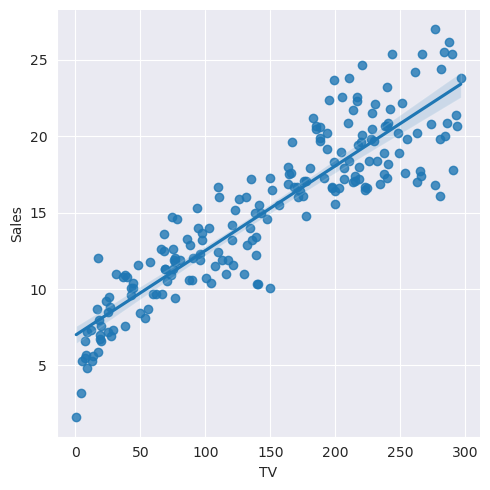

In [310]:
sns.lmplot(x='TV',y='Sales',data=df)
plt.show()

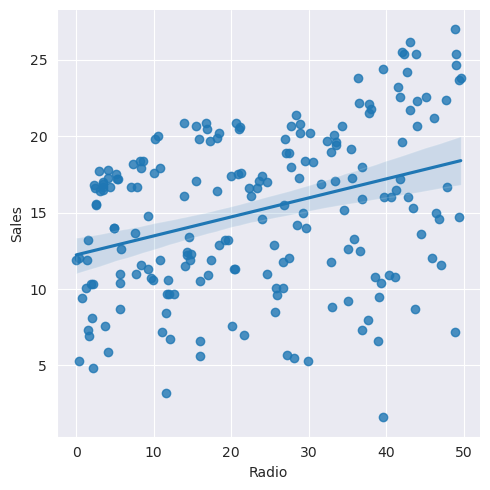

In [311]:
sns.lmplot(x='Radio',y='Sales',data=df)
plt.show()

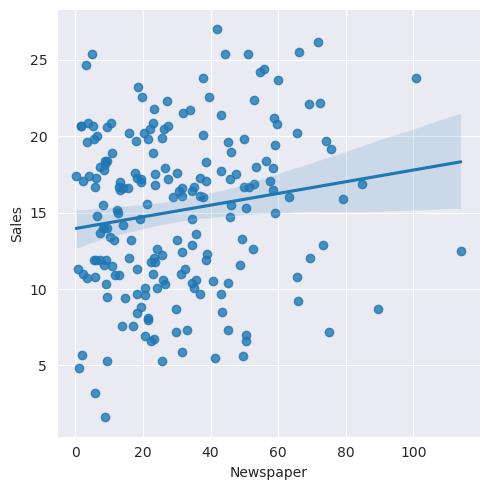

In [312]:
sns.lmplot(x='Newspaper',y='Sales',data=df)
plt.show()

TV has the highest correlation with the output variable Sales. This is observable, as only "TV vs Sales" plot has the best fit line pass through most of the plots

/home/meghadharsan/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


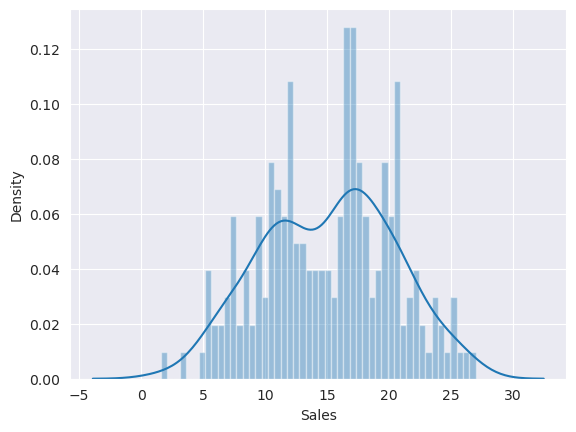

In [329]:
#3c
sns.distplot(df['Sales'],bins=50)
plt.show()

/home/meghadharsan/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


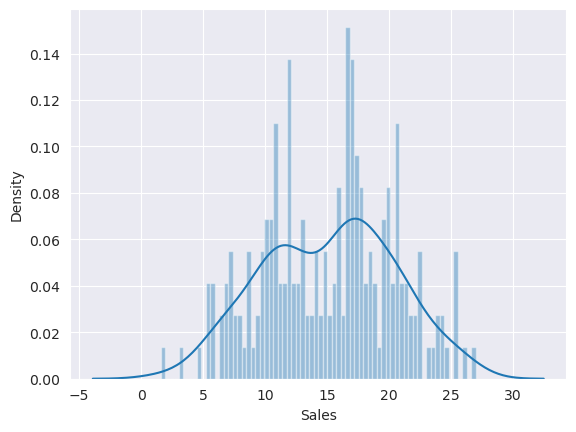

In [330]:
sns.distplot(df['Sales'],bins=70)
plt.show()

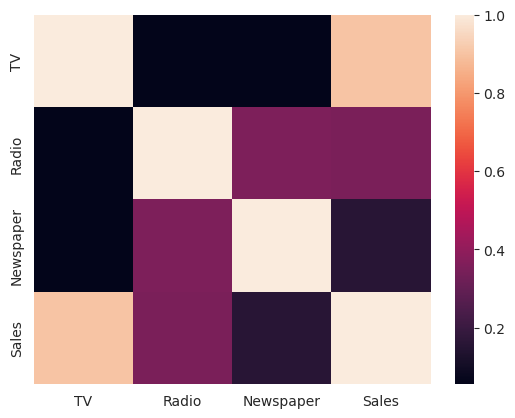

In [331]:
#4a
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr())
plt.show()
#TV has highest correlation with Sales

In [332]:
X = df['TV']
Y= df['Sales']

In [333]:
#4b
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.8)

In [334]:
#4c
X_train = X_train.values.reshape(-1,1)
slr = LinearRegression()
slr.fit(X_train,y_train)
y_pred = slr.predict(X_test.values.reshape(-1,1))

In [335]:
#4d
print("Slope : ",slr.coef_)
print("Intercept : ",slr.intercept_)

Slope :  [0.05499865]
Intercept :  6.863848420211491


In [336]:
#4e
print("MSE : ",metrics.mean_squared_error(y_test,y_pred))
print("MAE : ",metrics.mean_absolute_error(y_test,y_pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE :  5.734812212375438
MAE :  1.7133116232398848
RMSE :  2.394746795044403


In [337]:
#5a
#Splitting input and output
Xm = df.iloc[:,0:-1]
Ym = df.iloc[:,[-1]]

In [338]:
#splitting
X_train,X_test,ym_train,ym_test = train_test_split(Xm,Ym,train_size=0.8)

In [339]:
#model fitting
mlr = LinearRegression()
mlr.fit(X_train,ym_train)

LinearRegression()

In [340]:
#prediction
ym_pred = mlr.predict(X_test)

In [341]:
#printing coefficient
print("Coeff : ",mlr.coef_)
print("Intercept : ",mlr.intercept_)

Coeff :  [[ 0.05620235  0.11235562 -0.0060515 ]]
Intercept :  [4.51989525]


In [342]:
#Model Score
print("MSE : ",metrics.mean_squared_error(ym_test,ym_pred))
print("MAE : ",metrics.mean_absolute_error(ym_test,ym_pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(ym_test,ym_pred)))

MSE :  3.4905708963469664
MAE :  1.519855603148359
RMSE :  1.868306959882922


#5b
It is Clear that all the metrics have reduced clearly. Here the metrics we have obtained are all errors, and reduction in error is good to the model.
This is because compared to SLR, in MLR we have introduced few more features which helps is predicting the value more correctly and hence the reduction in error. The dependent variable relies on all independent variables and not only the variable which is highly correlated with it.